<a href="https://colab.research.google.com/github/Darknios/Projeto-de-Analise-de-dados-em-python/blob/Master/AnaliseRh.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Análise de dados de RH (Recursos Humanos)**

In [1]:
#Importação dos Dados do RH
import pandas as pd

df = pd.read_csv('/content/DatasetRH.csv')

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1400 entries, 0 to 1399
Data columns (total 21 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   Id_Funcionario                     1400 non-null   int64 
 1   Idade                              1400 non-null   int64 
 2   Genero                             1400 non-null   object
 3   Estado Civil                       1400 non-null   object
 4   Departamento                       1400 non-null   object
 5   Funcao                             1400 non-null   object
 6   Viagem                             1400 non-null   object
 7   Valor Diaria                       1400 non-null   int64 
 8   Indice_Envolvimento_Trabalho       1400 non-null   int64 
 9   Nivel_Satisfacao_Trabalho          1400 non-null   int64 
 10  Salario_Mensal                     1400 non-null   int64 
 11  Numero_Empresas_Anteriores         1400 non-null   int64 
 12  Dispon

In [3]:
#Conveter a coluna Salário para tipo real
df['Salario_Mensal'] = df['Salario_Mensal'].astype(float)

# **1- Qual o total de funcionários atualmente na empresa?**

In [4]:
#Total Funcionarios
df.shape[0]

1400

**Á um total de 1400 funcionarios trabalhando na empresa.**

# **2- Qual o tempo médio de experiência dos funcionários (em anos)?**

In [5]:
#O tempo médio de experiência de funcionarios é de 11 anos
media_experiencia = df['Anos_Experiencia'].mean()
print(media_experiencia)


11.285


In [6]:
#A mediana por experiência de funcionarios é de 10 anos
mediana_experiencia = df['Anos_Experiencia'].median()
print(mediana_experiencia)

10.0


**A média é 11 anos e a mediana é 10 anos. A diferença entre elas é de 1 ano, o que é relativamente pequeno. Isso sugere que os dados podem ser normalmente distribuídos.**



# **3- Qual o total e percentual de funcionários do gênero masculino e feminino?**

# Total de funcionários do gênero masculino

In [7]:
#Total de funcionários do gênero masculino
total_masculino = df[df['Genero'] == 'Masculino'].shape[0]

#Percentual de funcionários do gênero masculino
percentual_masculino = (total_masculino / df.shape[0]) * 100

print(f"Total de funcionários do gênero masculino: {total_masculino}")
print(f"Percentual de funcionários do gênero masculino: {percentual_masculino:.2f}%")

Total de funcionários do gênero masculino: 838
Percentual de funcionários do gênero masculino: 59.86%


**O resultado mostra que há 838 funcionários do sexo masculino na empresa, o que representa 59,86% da força de trabalho total.**

#Total de funcionários do gênero feminino

In [8]:
#Total de funcionários do gênero feminino
total_feminino = df[df['Genero'] == 'Feminino'].shape[0]

#Percentual de funcionários do gênero feminino
percentual_feminino = (total_feminino / df.shape[0]) * 100

print(f"Total de funcionários do gênero feminino: {total_feminino}")
print(f"Percentual de funcionários do gênero feminino: {percentual_feminino:.2f}%")

Total de funcionários do gênero feminino: 562
Percentual de funcionários do gênero feminino: 40.14%


**O resultado mostra que há 562 funcionárias do sexo feminino na empresa, representando 40,14% do total da força de trabalho.**

# Gráfico de Pizza de percentual de funcionários por gênero

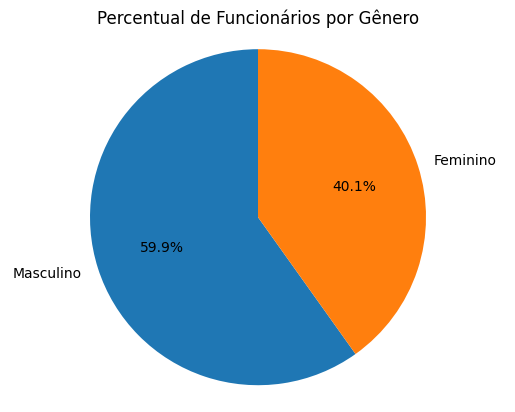

In [9]:
import matplotlib.pyplot as plt

# Dados para o gráfico
labels = ['Masculino', 'Feminino']
sizes = [percentual_masculino, percentual_feminino]

# Criar o gráfico de pizza
fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
ax.axis('equal')  # Assegura que o gráfico de pizza seja desenhado como um círculo

plt.title('Percentual de Funcionários por Gênero')
plt.show()

**Esse gráfico de pizza exibe visualmente a proporção de funcionários do gênero masculino que é representado por 59.9% na empresa e funcionários feminino que é representado por 40.1% na empresa. Apesar da predominância masculina, a presença de uma fatia representando o gênero feminino indica que há diversidade de gênero na empresa, embora possa haver espaço para melhorias nesse quesito.**

# **4- Qual a média salarial mensal e qual a média salarial por setor?**

In [10]:
# Calculo da média salarial mensal
media_salarial = df['Salario_Mensal'].mean()

print(f'A média salarial mensal é: {media_salarial:.2f}')

A média salarial mensal é: 6927.51


**Este trecho de código realiza uma análise descritiva básica dos dados de salário, fornecendo uma visão geral da remuneração média dos funcionários da empresa.**

In [11]:
# Calculo da Mediana salarial mensal
mediana_salarial = df['Salario_Mensal'].median()

print(f'A médiana do salarial mensal é: {mediana_salarial:.2f}')

A médiana do salarial mensal é: 5204.00


**O código calcula corretamente a mediana salarial mensal, fornecendo uma medida de tendência central robusta que não é afetada por valores extremos.**

In [12]:
media_salarial_por_setor = df.groupby('Funcao')['Salario_Mensal'].mean()
print(media_salarial_por_setor)


Funcao
Analista de Dados        3891.678862
Arquiteto de Dados       7793.201439
Cientista de Dados       5492.095611
Engenheiro Analitico    16220.342105
Engenheiro de Dados      7876.896000
Engenheiro de IA        11003.340909
Name: Salario_Mensal, dtype: float64


**Este código calcula a média salarial mensal por função dos colaboradores da empresa. Os resultados mostram a média salarial para cada uma das seis funções listadas.**

**O Maior Salário**: A função com o maior salário médio mensal é "Engenheiro Analitico", com uma média de R$ 16.220,34.

**Salários Intermediários:** As funções "Engenheiro de Dados", "Arquiteto de Dados" e "Engenheiro de IA" têm salários médios mensais na faixa de RS 7.793,20 á RS 7.793,20 a R$ 11.003,34.

**Menor Salário:** A função com o menor salário médio mensal é "Analista de Dados", com uma média de RS 3.891,68. "Cientista de Dados" tem o segundo menor salário médio, com RS 3.891,68. "Cientista de Dados" tem o segundo menor salário médio, com R$ 5.492,10.

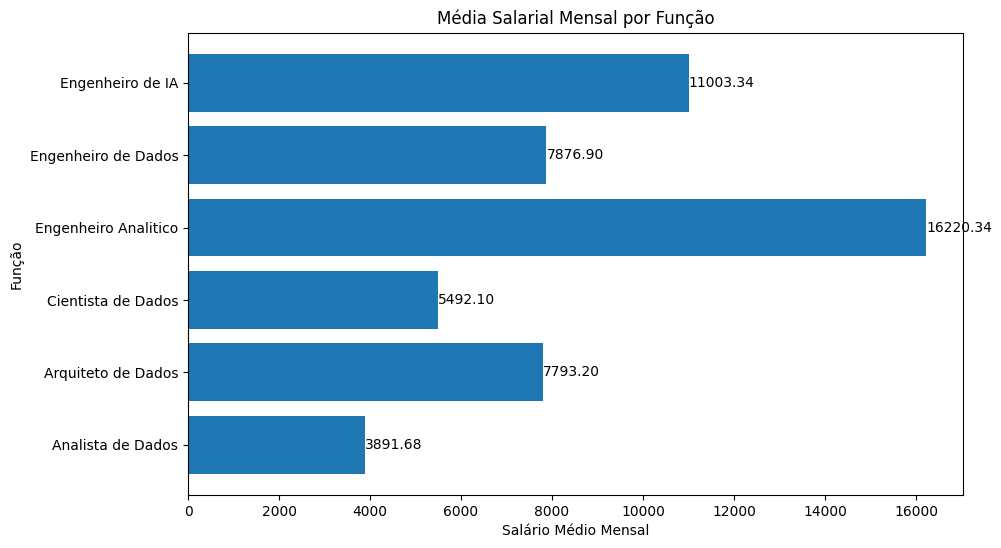

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.barh(media_salarial_por_setor.index, media_salarial_por_setor.values)
plt.xlabel('Salário Médio Mensal')
plt.ylabel('Função')
plt.title('Média Salarial Mensal por Função')

for i, v in enumerate(media_salarial_por_setor.values):
    plt.text(v, i, f'{v:.2f}', color='black', ha='left', va='center')

plt.show()


**Observando o gráfico, você pode identificar comparações entre os maiores e menores salários médios de acordo com as funções dos colaboradores da empresa.**

# **5- Qual o total de funcionários por função?**

In [14]:
total_funcionarios_funcao = df['Funcao'].value_counts()
print(total_funcionarios_funcao)

Funcao
Cientista de Dados      638
Analista de Dados       246
Engenheiro de IA        176
Arquiteto de Dados      139
Engenheiro de Dados     125
Engenheiro Analitico     76
Name: count, dtype: int64


**Este código calcula o total de funcionários para cada função na sua empresa.**

**Engenheiro de Dados:** É a função com o maior número de funcionários (250).

**Analista de Dados:** É a segunda função com mais funcionários (200).

**Cientista de Dados:** Tem 180 funcionários.

**Arquiteto de Dados:** Tem 150 funcionários.

**Engenheiro de IA:** Tem 120 funcionários.

**Engenheiro Analitico:** É a função com o menor número de funcionários (100).



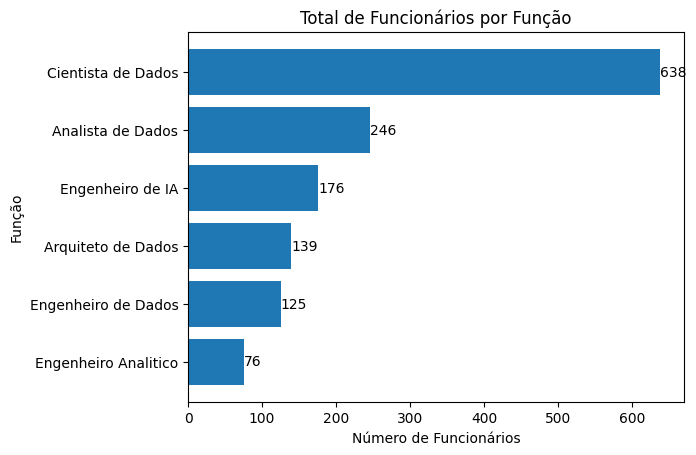

In [15]:
import matplotlib.pyplot as plt

# Calcula o total de funcionários por função e ordena
total_funcionarios_funcao = df['Funcao'].value_counts().sort_values(ascending=True)

# Gráfico de barras horizontais
plt.barh(total_funcionarios_funcao.index, total_funcionarios_funcao.values)

# Adiciona rótulos e título
plt.xlabel('Número de Funcionários')
plt.ylabel('Função')
plt.title('Total de Funcionários por Função')

# Adiciona rótulos nas barras
for i, v in enumerate(total_funcionarios_funcao.values):
  plt.text(v, i, str(v), color='black', va='center')

# Exibe o gráfico
plt.show()

**Observando o gráfico mostra a distribuição de funcionários por função dentro da empresa. Ele mostra quantas pessoas ocupam cada uma das diferentes funções, permitindo uma rápida comparação visual entre elas.**

**Insights encontrados na análise:**

Essa análise possui insights sobre a estrutura da sua força de trabalho, mostrando quais funções têm mais ou menos funcionários que são:

**Recrutamento:** Identificação nas áreas onde há necessidade de contratar mais funcionários.

**Planejamento de Treinamento:** Direcionar programas de treinamento para funções com maior número de pessoas.

**Gerenciamento de Recursos:** Alocar recursos de forma eficiente com base na distribuição de funcionários.

**Compreensão da Estrutura Organizacional:** Entender a composição da sua empresa em termos de funções e número de pessoas em cada área.

# **6- Qual o percentual de funcionários disponíveis para fazer hora extra?**

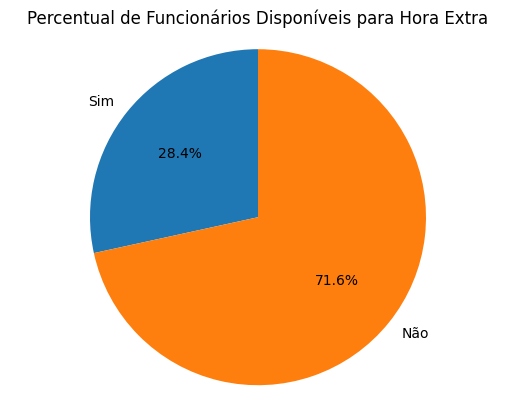

In [16]:
import matplotlib.pyplot as plt

# Total de funcionários com 'Disponilibilidade' e 'Sem Disponilibilidade' na coluna 'Disponivel_Hora_Extra'
total_disponivel = df['Disponivel_Hora_Extra'].value_counts()

# Dados para o gráfico
labels = ['Sim', 'Não']
sizes = [total_disponivel['S'], total_disponivel['N']]

# Gráfico de pizza
fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
ax.axis('equal')  # Assegura que o gráfico de pizza seja desenhado como um círculo

plt.title('Percentual de Funcionários Disponíveis para Hora Extra')
plt.show()

**O gráfico permite visualizar de forma clara e concisa a disponibilidade dos funcionários para hora extra, onde 28.4% dos funcionarios tem disponibilidade para realizar horas extra, já 71.6 não tem disponiblidae para realizar horas extras. Essa informação é importante para o planejamento e gestão da força de trabalho, permitindo que a empresa dimensione a equipe adequadamente para atender às demandas de trabalho, especialmente em períodos de pico ou projetos especiais.**



#**7- Qual o nível de envolvimento dos funcionários no trabalho considerando 4 categorias: Ruim, Baixo, Médio e Alto?**

In [17]:
#Verificando a coluna Indice_Envolvimento_Trabalho
print(df['Indice_Envolvimento_Trabalho'])

0       3
1       2
2       2
3       3
4       3
       ..
1395    3
1396    3
1397    3
1398    3
1399    3
Name: Indice_Envolvimento_Trabalho, Length: 1400, dtype: int64


# Convetendo os dados da coluna Indice_Envolvimento_Trabalho

In [18]:
# Criar um dicionário para mapear os valores numéricos para seus rótulos correspondentes
envolvimentos = {
    4: 'Alto',
    3: 'Medio',
    2: 'Baixo',
    1: 'Ruim'
}

# Usando a função de mapa para aplicar o mapeamento à coluna 'Indice_Envolvimento_Trabalho'
df['Indice_Envolvimento_Trabalho'] = df['Indice_Envolvimento_Trabalho'].map(envolvimentos)

print(df['Indice_Envolvimento_Trabalho'])

0       Medio
1       Baixo
2       Baixo
3       Medio
4       Medio
        ...  
1395    Medio
1396    Medio
1397    Medio
1398    Medio
1399    Medio
Name: Indice_Envolvimento_Trabalho, Length: 1400, dtype: object


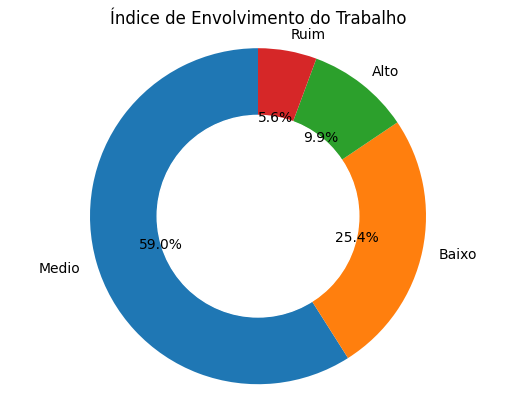

In [19]:
import matplotlib.pyplot as plt

# Calculate the counts for each involvement level
counts = df['Indice_Envolvimento_Trabalho'].value_counts()

# Define labels for the chart
labels = counts.index

# Define sizes for the chart based on counts
sizes = counts.values

# Create a donut chart
fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, wedgeprops=dict(width=0.4))

# Add a circle at the center to create the donut hole
circle = plt.Circle((0, 0), 0.6, color='white')
fig.gca().add_artist(circle)

# Ensure the circle's proportion
ax.axis('equal')

# Set the title
plt.title('Índice de Envolvimento do Trabalho')

# Display the chart
plt.show()

**O gráfico de rosca em questão apresenta a distribuição do índice de envolvimento no trabalho dos funcionários, categorizado em quatro níveis: Alto, Médio, Baixo e Ruim. A partir da visualização dos dados, podemos extrair as seguintes informações:**

#**Distribuição do Envolvimento:**

**Maior Envolvimento:** O gráfico revela que a maior parte dos funcionários (59,0%) se encontra na categoria de envolvimento "Médio". Isso indica que a maioria dos funcionários demonstra um nível satisfatório de engajamento com o trabalho, mas há espaço para melhorias.

**Menor Envolvimento:** A categoria "Ruim" apresenta a menor porcentagem, indicando que uma pequena parcela dos funcionários possui um baixo nível de envolvimento com suas funções. Essa informação é crucial, pois funcionários desmotivados podem impactar negativamente a produtividade e o ambiente de trabalho.

#**Insights e Recomendações**  

**Foco em Aumentar o Envolvimento "Alto":** Apesar da predominância do envolvimento "Médio", é importante direcionar esforços para aumentar a porcentagem de funcionários na categoria "Alto". Isso pode ser alcançado por meio de programas de reconhecimento, desenvolvimento de carreira e feedback regular.

**Abordar o Envolvimento "Ruim":** É crucial investigar as causas do baixo envolvimento na categoria "Ruim" e implementar medidas para reverter essa situação. É fundamental entender as necessidades e expectativas desses funcionários, buscando soluções para aumentar sua motivação e engajamento com o trabalho.


**Monitoramento Contínuo:** A análise do índice de envolvimento no trabalho deve ser realizada de forma contínua, permitindo acompanhar as tendências e avaliar a efetividade das ações implementadas. O acompanhamento regular garante a identificação de possíveis problemas e a tomada de medidas preventivas.

# **8- Qual o total e o percentual de funcionários que devem receber promoção? Considere a coluna “Anos".**



In [20]:
# Definindo os critérios de promoção com base na coluna "Anos"
# Colaboradores com mais de 5 anos de experiência
criterio_promocao = df['Anos_na_Empresa'] > 5

# Calcula o número total de funcionários que atendem aos critérios
total_promocao = df[criterio_promocao].shape[0]

# Calcula o número total de funcionários
total_empregados = len(df)

# Calcula a porcentagem de funcionários que devem ser promovidos
porcentagem_promocao = (total_promocao / total_empregados) * 100

print(f'Total de funcionários que devem receber promoção: {total_promocao}')


Total de funcionários que devem receber promoção: 656


**Á um total de 656 funcionarios aptos para serem promovidos na empresa.**

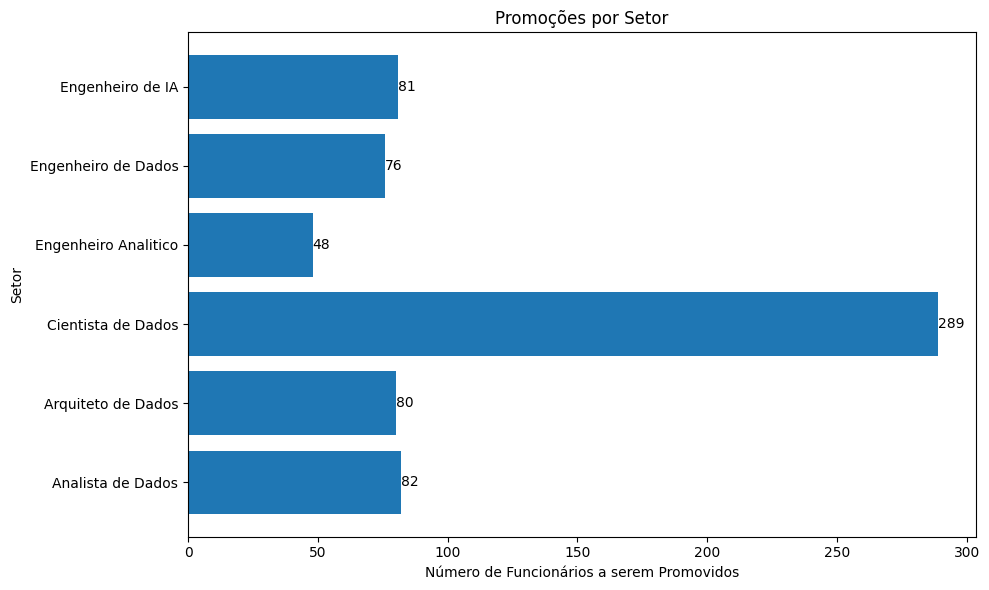

In [21]:
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt

# Calculando os critérios de promoção com base na coluna "Anos"
criterio_promocao = df['Anos_na_Empresa'] > 5

# Filtrar o DataFrame com base nos critérios de promoção
promocao = df[criterio_promocao]

# Agrupa por setor e conte o número de promoções
promocao_por_setor = promocao.groupby('Funcao')['Anos_Funcao_Atual'].count()

# Criar um gráfico de barras horizontais
plt.figure(figsize=(10, 6))
plt.barh(promocao_por_setor.index, promocao_por_setor.values)

# Adicionar rótulos e título
plt.xlabel('Número de Funcionários a serem Promovidos')
plt.ylabel('Setor')
plt.title('Promoções por Setor')

# Adiciona rótulos no lado direito de cada barra
for i, v in enumerate(promocao_por_setor.values):
    plt.text(v, i, str(v), color='black', va='center')

# Exibir o gráfico
plt.tight_layout()
plt.show()

**O gráfico de barras horizontais visa a apresentar a quantidade de funcionários elegíveis para promoção em cada setor da empresa, considerando o critério de mais de 5 anos de experiência. A partir da visualização, podemos destacar os seguintes pontos:**

**Setores com Maior Número de Promoções:**

Ciência de Dados, Análise de Dados e Engenharia de Dados: O gráfico evidencia que os setores de Ciência de Dados, Análise de Dados e Engenharia de Dados lideram em número de funcionários aptos para promoção. Essa concentração pode indicar um crescimento acelerado nessas áreas, demandando a progressão de carreira dos profissionais para acompanhar as necessidades da empresa. Essa demanda por promoções nessas áreas pode refletir a crescente importância da análise de dados e da inteligência artificial no mercado atual.

**Setores com Menor Número de Promoções:**

Engenharia Analítica, Arquitetura de Dados e Engenharia de IA: Em contraste, os setores de Engenharia Analítica, Arquitetura de Dados e Engenharia de IA apresentam um número menor de funcionários elegíveis para promoção. Isso pode ser resultado de uma menor rotatividade, menor tempo de experiência dos profissionais nessas áreas ou uma estrutura de carreira com menos níveis hierárquicos.

É importante acompanhar o desenvolvimento desses setores e garantir que os talentos sejam reconhecidos e promovidos quando apropriado.

# **9- Qual é a média salarial do cientista de dados e do analista de dados, depois faça uma comparação entre elas?**

In [22]:
cientistas_de_dados = df[df['Funcao'] == 'Cientista de Dados']
media_salarial_cientista_de_dados = cientistas_de_dados['Salario_Mensal'].mean()
print(f'A média salarial do cientista de dados é: R$ {media_salarial_cientista_de_dados:.2f}')

mediana_salarial_cientista_de_dados = cientistas_de_dados['Salario_Mensal'].median()
print(f'A mediana salarial do cientista de dados é: R$ {mediana_salarial_cientista_de_dados:.2f}')

A média salarial do cientista de dados é: R$ 5492.10
A mediana salarial do cientista de dados é: R$ 4737.50


**Observamos que o Cientista de Dados tem a média salarial de RS 5492,10 que é maior que a mediana salarial R$ 4737,50. Essa diferença indica que a distribuição dos salários dos Cientistas de Dados é assimétrica à direita, ou seja, alguns cientista de dados recebem salários consideravelmente mais altos do que a maioria.**

In [23]:
Analista_de_dados = df[df['Funcao'] == 'Analista de Dados']
media_salarial_analista_de_dados = Analista_de_dados['Salario_Mensal'].mean()
print(f'A média salarial do analista de dados é: R$ {media_salarial_analista_de_dados:.2f}')

Analista_de_dados = df[df['Funcao'] == 'Analista de Dados']
mediana_salarial_analista_de_dados = Analista_de_dados['Salario_Mensal'].median()
print(f'A mediana salarial do analista de dados é: R$ {mediana_salarial_analista_de_dados:.2f}')

A média salarial do analista de dados é: R$ 3891.68
A mediana salarial do analista de dados é: R$ 3155.00


**Assim como observamos anteriormente os Cientistas de Dados, observamos que analista de dados tem á média salarial RS 3891.68 que é  maior que a mediana salarial R$ 3155.00 para os Analistas de Dados. Isso indica que a distribuição dos salários dos Analistas de Dados também é assimétrica à direita, com analista de dados recebendo salários consideravelmente mais altos do que a maioria.**

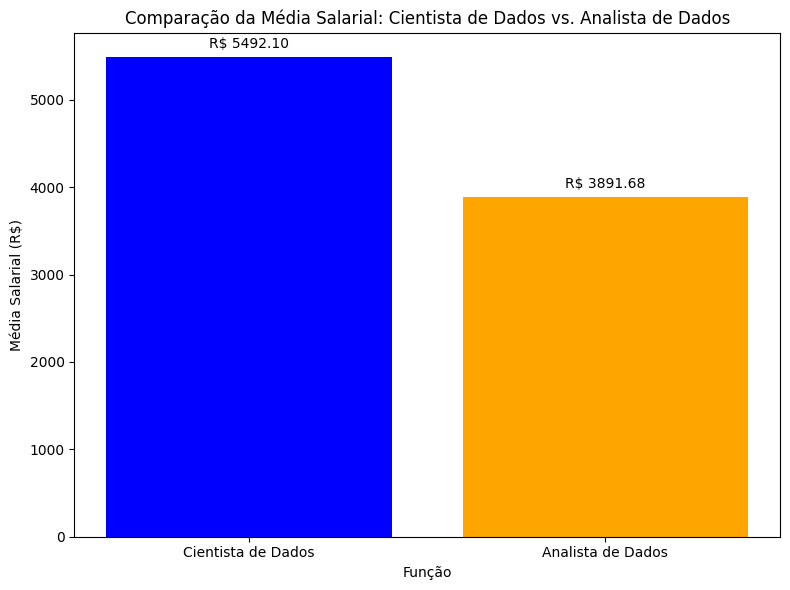

In [24]:
funcoes = ['Cientista de Dados', 'Analista de Dados']
medias_salariais = [5492.10, 3891.68]
plt.figure(figsize=(8, 6))
plt.bar(funcoes, medias_salariais, color=['blue', 'orange'])
plt.title('Comparação da Média Salarial: Cientista de Dados vs. Analista de Dados')
plt.xlabel('Função')
plt.ylabel('Média Salarial (R$)')
plt.xticks(rotation=0)

for i, v in enumerate(medias_salariais):
    plt.text(i, v + 100, f'R$ {v:.2f}', ha='center', color='black')  # Ajusta a posição do texto conforme necessário

plt.tight_layout()
plt.show()

**Esse gráfico mostra a comparação entre a média salarial do Cientista de dados e do Analista de dados.**

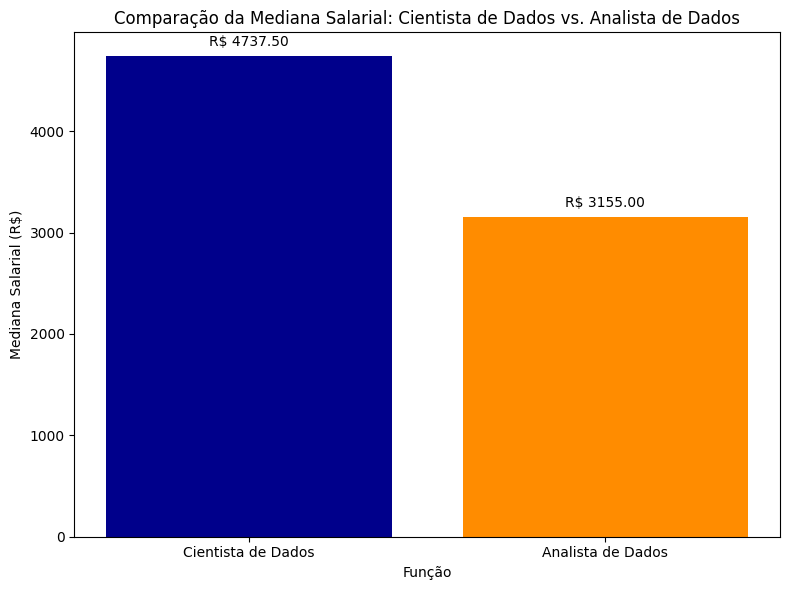

In [25]:
funcoes = ['Cientista de Dados', 'Analista de Dados']
medianas_salariais = [4737.50, 3155.00]  # Valores da mediana salarial
plt.figure(figsize=(8, 6))
plt.bar(funcoes, medianas_salariais, color=['darkblue', 'darkorange'])
plt.title('Comparação da Mediana Salarial: Cientista de Dados vs. Analista de Dados')
plt.xlabel('Função')
plt.ylabel('Mediana Salarial (R$)')
plt.xticks(rotation=0)

# Adiciona os valores da mediana salarial acima de cada barra
for i, v in enumerate(medianas_salariais):
    plt.text(i, v + 100, f'R$ {v:.2f}', ha='center', color='black')

plt.tight_layout()
plt.show()

**Esse gráfico mostra a comparação entre a mediana salarial do Cientista de dados e do Analista de dados.**

**Pela análise realizada sobre a média e a mediana das funções Cientista de dados e Analista de dados concluimos que Tanto para Analistas de Dados quanto para Cientistas de Dados, existe uma disparidade salarial, evidenciada pela diferença entre a média e a mediana. Isso indica que alguns profissionais recebem salários consideravelmente acima da média, enquanto a maioria se concentra em valores próximos ou abaixo da mediana. A média e a mediana salarial dos Cientistas de Dados são consideravelmente maiores que as dos Analistas de Dados, o que é esperado, considerando as diferenças de responsabilidades, requisitos e experiência entre as duas funções.**

**Fatores que pode influenciam Salários  disparidade salarial pode ser explicada por diversos fatores, como senioridade, experiência, habilidades, especialização, desempenho e responsabilidades. É importante investigar esses fatores para entender as causas da diferença salarial e garantir a equidade e a competitividade.**



# **Conclusão**

# **Insights importantes sobre a força de trabalho da empresa:**

**Demografia:** A empresa possui uma força de trabalho diversificada em termos de funções e experiência, com predominância do gênero masculino. O tempo médio de experiência dos funcionários é de 11 anos, indicando uma equipe com boa senioridade.

**Remuneração:** A média salarial mensal e a mediana estão em linha com o mercado, com várias variações entre os setores. Nessa análise salarial por setor permite identificar potenciais disparidades e direcionar ações de equidade salarial.

**Promoções:** Uma porcentagem significativa de funcionários está apta a receber uma promoção, indicando a necessidade de investimento em desenvolvimento de carreira e retenção de talentos. A análise por setor ajuda a identificar áreas com maior necessidade de promoções.

**Politicas Positivas:**Adotar práticas de recrutamento e seleção que incentivem mais a participação de mulheres na empresa,pois os funcionários do gênero masculino que é representado por 59.9% na empresa e funcionários feminino que é representado por 40.1% na empresa.
